 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

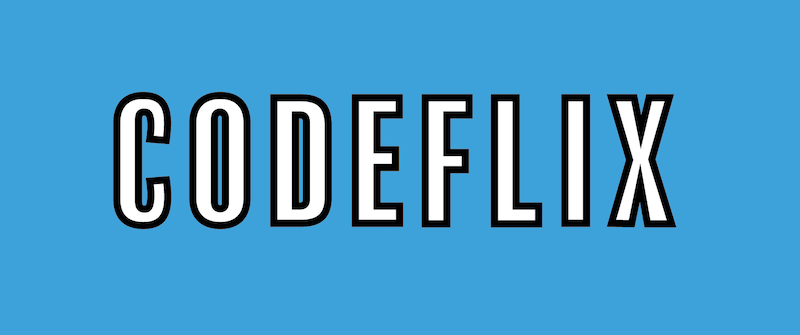

In [4]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

display(Image(generic_image))

In [6]:
class Video:
    def __init__(self):
        self.title = ''
        self.length = timedelta
        self.link = generic_image
        
    def play(self):
        print(f"Now Playing {self.title}")
        display(Image(self.link))
        
    def pause(self):
        print("Video paused")
        
    def __repr__(self):
        return f"{self.title} is {self.lenght.seconds} seconds long." 
        

Now Playing Cool Video


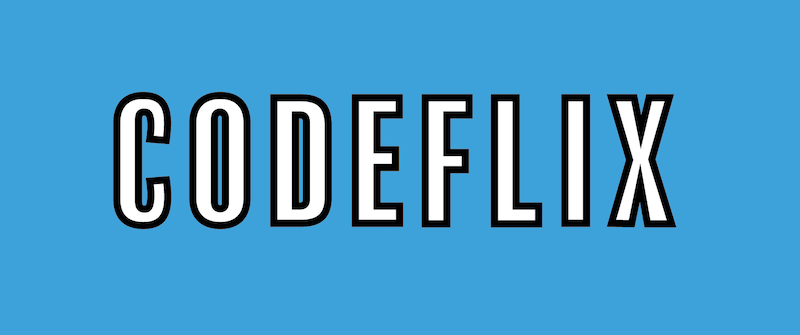

In [7]:
vid = Video()
vid.title = "Cool Video"

vid.play()

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [15]:
#class child(parent)
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.length = timedelta(minutes = data['runtime'])
        self.title = data['name']
        if data['image']:
            self.link = data['image']['medium']
        
        

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [56]:
class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query=''):
        data = None
        while not data:
            if not query:
                query = input("What is the name of the series? ")
            r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series Error: status code {r.status_code}")
                query = ''
        
        # use data to fill attributes
        self.id = data['id']
        self.title = data['name']
        self.genres = data['genres']
        self.summary = data['summary']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        # API Call for episodes
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f'Episode Error: status code {r.status_code}')
            return
        
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")
     
    
    def play(self):
        #add an input asking for which episode
        choose_episode = input("""
            Play from the begining: [1]
            Choose Episode: [2]  
        """)
        if choose_episode == '1':
            for i in range(len(self.episodes)):
                if i > 0 and i % 3 == 0:
                    watching = input("Are you still watching? y/N")
                    if watching.lower().strip() not in ('yes','y'):
                        break
                self.episodes[i].play()
                sleep(self.episodes[i].length.seconds/1000)
        elif choose_episode == '2':
            episode_num = int(input("Enter the episode number you would like to play? "))
            episode_int = episode_num-1
            for i in range(episode_int, len(self.episodes)):
                if i > 0 and i % 3 == 0:
                    watching = input("Are you still watching? y/N")
                    if watching.lower().strip() not in ('yes','y'):
                        break
                self.episodes[i].play()
                sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
                    
                    
        

What is the name of the series? breaking bad
Breaking Bad has 62 episodes.

            Play from the begining: [1]
            Choose Episode: [2]  
        2
Enter the episode number you would like to play? 30
Are you still watching? y/Ny
Now Playing Abiquiu


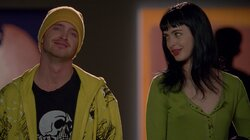

Now Playing Half Measures


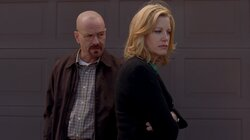

Now Playing Full Measure


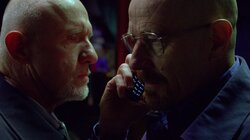

Are you still watching? y/Nn


In [52]:
first_show = Series()
first_show.get_info()
first_show.play()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [20]:
len(first_show)

62

In [57]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    
    # add_user 
    def add_user(self, name=''):
        if not name:
            name = input('What is the name of your new user? ')
        self.users.append(name)
        self.choose_user()
            
    # choose_user
    def choose_user(self):
        while True:
            print('Users:')
            for user in self.users:
                print(user)
            current = input('Choose a user: ')
            if current in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a user.")
            
    # add_to_watch_list
    def add_to_watch_list(self, query=""):
        show = Series()
        show.get_info(query)
        self.watch_list.append(show)
        print(f"{show.title} has been added to the watchlist")
    
    # choose_from_watch_list
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n{series.summary}")
            display(Image(series.episodes[0].link))
            
        watch = input('What do you want to watch? ')
        
        if watch.lower() in list(map( lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play()
        else:   
            response = input(f'{watch} is not in your watch list. Would you like to add it? y/N')
            if response in ('yes','y'):
                self.add_to_watch_list(watch)
                self.watch_list[-1].play()

    # run 
    def run(self):
        """
            Method allowing users to choose a series and play episodes.
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input('Create a profile: ')
            self.add_user(name)
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watch list
            Add    - Add a new user
            Quit   - Close the app
        """)
        
        while True:
            response = input('What would you like to do ( search, watch, add, quit)')
            
            if response.lower() == "search":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "quit":
                print(f"Thanks for watching {self.current_user}.")
                break
            else:
                print('Incorrect input... Try again.')


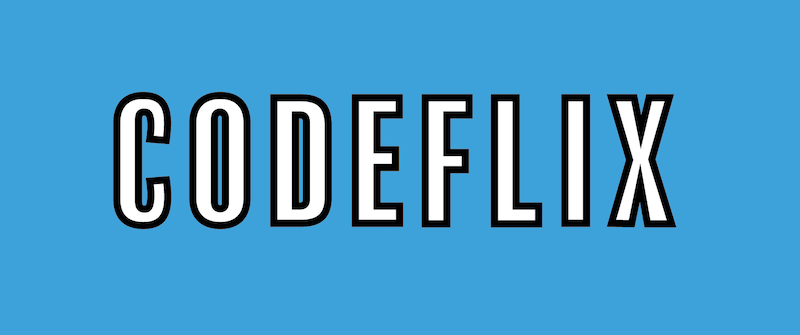

Create a profile: b
Users:
b
Choose a user: b
b

            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watch list
            Add    - Add a new user
            Quit   - Close the app
        
What would you like to do ( search, watch, add, quit)watch
What do you want to watch? breaking bad
breaking bad is not in your watch list. Would you like to add it? y/Ny
Breaking Bad has 62 episodes.
Breaking Bad has been added to the watchlist

            Play from the begining: [1]
            Choose Episode: [2]  
        2
Enter the episode number you would like to play? 30
Now Playing Fly


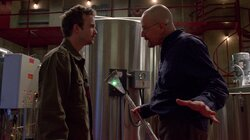

Are you still watching? y/Ny
Now Playing Abiquiu


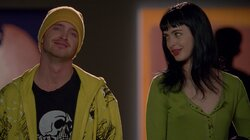

Now Playing Half Measures


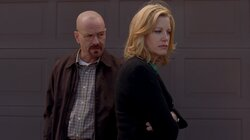

Now Playing Full Measure


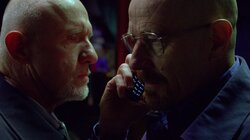

Are you still watching? y/Ny
Now Playing Box Cutter


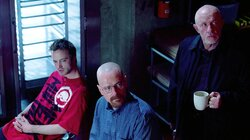

Now Playing Thirty-Eight Snub


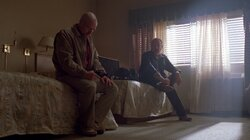

Now Playing Open House


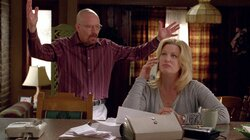

Are you still watching? y/Nn


In [ ]:
codeflix = Theater()
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...